In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [110]:
DATA_DIR = '/home/iiticos/Desktop/Personal Docs/QC/IMC-Prosperity_2024/Data/round2/'

list = ['prices_round_2_day_-1.csv','prices_round_2_day_1.csv','prices_round_2_day_0.csv']

df1 = pd.read_csv(DATA_DIR + list[0], sep=';')
df2 = pd.read_csv(DATA_DIR + list[1], sep=';')
df3 = pd.read_csv(DATA_DIR + list[2], sep=';')

print(df1['ORCHIDS'].min())
print(df2['ORCHIDS'].min())
print(df3['ORCHIDS'].min())

# df1['bid_price_1'].head(100).plot()

1146.75
1009.25
960.75


In [111]:
df = pd.concat([df1, df3, df2], ignore_index=True)

<Axes: >

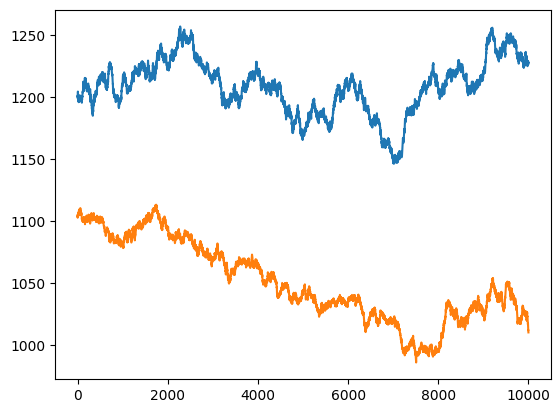

In [112]:
feature = 'ORCHIDS'
df1[feature].plot()
# df2[feature].plot()
# df3[feature].plot()
# df[feature].plot()
((df2[feature] + df3[feature])/2).plot()

In [113]:
col_names = df.columns
col_names

Index(['timestamp', 'ORCHIDS', 'TRANSPORT_FEES', 'EXPORT_TARIFF',
       'IMPORT_TARIFF', 'SUNLIGHT', 'HUMIDITY', 'DAY'],
      dtype='object')

<Axes: >

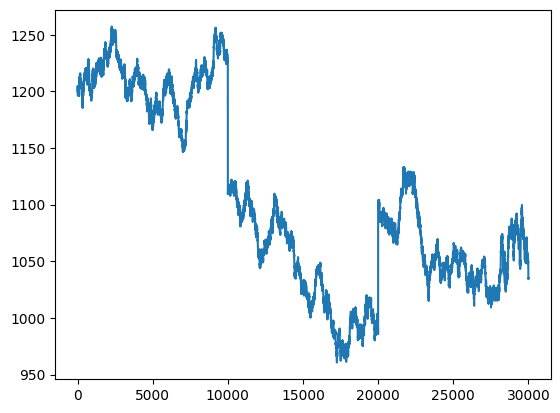

In [114]:
df[feature].plot()

In [115]:
def lagit(df,lags):
    names = []
    for i in range(1,lags+1):
        df['Lag_'+str(i)] = df['ORCHIDS'].shift(i)
        names.append('Lag_'+str(i))
    return names

In [116]:
lagnames = lagit(df,4)
lagnames

['Lag_1', 'Lag_2', 'Lag_3', 'Lag_4']

In [117]:
df.dropna(inplace=True)

In [118]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
model = LinearRegression()

In [119]:
target = 'ORCHIDS'
df = df.drop(columns = ['timestamp','DAY'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=[target]), df[target], test_size=0.3, random_state=42, shuffle=False)

In [120]:
X_train

,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,Lag_1,Lag_2,Lag_3,Lag_4
4,1.5,9.5,-2.0,2497.7166,79.01649,1201.75,1201.75,1201.75,1200.00
5,1.5,9.5,-2.0,2497.1614,79.02066,1201.75,1201.75,1201.75,1201.75
6,1.5,9.5,-2.0,2496.6125,79.02485,1200.25,1201.75,1201.75,1201.75
7,1.5,9.5,-2.0,2496.0698,79.02906,1201.75,1200.25,1201.75,1201.75
8,1.5,9.5,-2.0,2495.5334,79.03329,1202.75,1201.75,1200.25,1201.75
...,...,...,...,...,...,...,...,...,...
20998,1.1,8.5,-5.5,1700.9775,84.92530,1070.75,1071.25,1071.75,1072.25
20999,1.1,8.5,-5.5,1700.7317,84.94393,1071.75,1070.75,1071.25,1071.75
21000,1.1,8.5,-5.5,1700.4869,84.96259,1072.00,1071.75,1070.75,1071.25
21001,1.1,8.5,-5.5,1700.2429,84.98128,1071.75,1072.00,1071.75,1070.75


In [121]:
model.fit(X_train, y_train)

LinearRegression()

In [122]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate training MSE, RMSE, and R-squared score
y_train_pred = model.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
train_r2 = r2_score(y_train, y_train_pred)

# Calculate testing MSE, RMSE, and R-squared score
y_test_pred = model.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
test_r2 = r2_score(y_test, y_test_pred)
print(f"Training R-squared score: {train_r2}")
print(f"Testing R-squared score: {test_r2}")

Training R-squared score: 0.9997207763615388
Testing R-squared score: 0.9985303367349453


/home/iiticos/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/iiticos/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


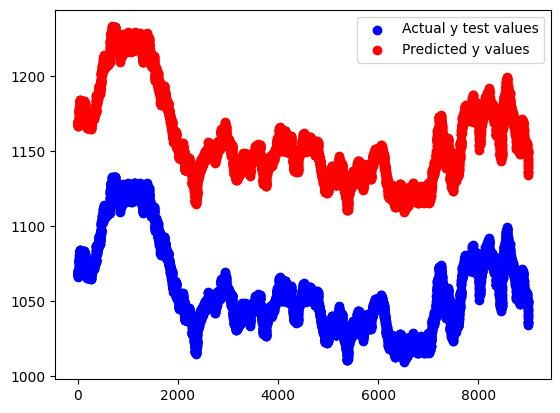

In [130]:
import matplotlib.pyplot as plt

# Get the actual y test values and the predicted y values
y_test_pred = model.predict(X_test)
y_test_pred = y_test_pred + 100
# Plot the actual y test values and the predicted y values
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual y test values')
plt.scatter(range(len(y_test_pred)), y_test_pred, color='red', label='Predicted y values')
plt.legend()
plt.show()

# MANUAL TRADING


In [133]:
goods = ['Pizza','wasabi','snowball','shells']

trading_matrix = [[1,0.48,1.52,0.71],
                  [2.05,1,3.26,1.56],
                  [0.64,0.3,1,0.46],
                  [1.41,0.61,2.08,1]]